Interpretación de EAM

Cuando calculamos el Error Cuadrático Medio (ECM), a menudo usamos la media de los valores observados como una constante. 

¿Podemos aplicar el mismo principio para el EAM?

En un modelo constante, el objetivo es seleccionar un valor que minimice el EAM de todas las predicciones. Necesitamos encontrar un valor constante, a, que resulte en el EAM más bajo posible. La fórmula para el EAM es la siguiente: 

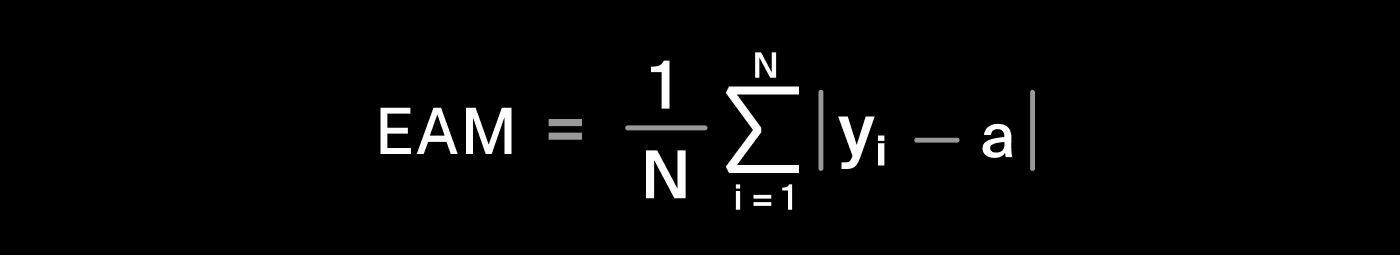

Curiosamente, el valor que minimiza el EAM es la mediana de los valores objetivo. 

Ten en cuenta que en los ejercicios nos referiremos a los términos EAM y ECM por sus términos en inglés: MAE y MSE, respectivamente.
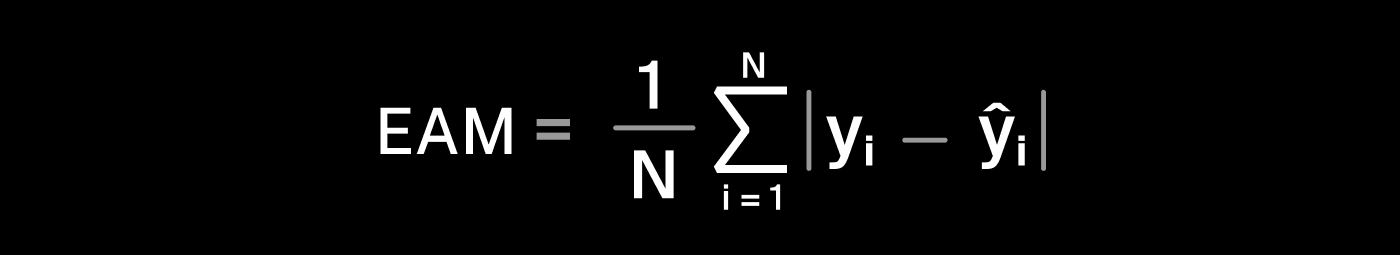

Calcula el EAM utilizando la mediana como valor constante. El cálculo EAM para la regresión lineal se encuentra en el precódigo. Compara los valores.

Muestra el resultado en la pantalla.

Haz una predicción de todas las respuestas, usando la mediana de la siguiente manera:

predicted_valid = pd.Series(target_train.median(), index=target_valid.index)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

data = pd.read_csv('/datasets/flights_preprocessed.csv')

target = data['Arrival Delay']
features = data.drop(['Arrival Delay'], axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print('Linear Regression')
print(mean_absolute_error(target_valid, predicted_valid))
print()

predicted_valid = pd.Series(target_train.median(), index=target_valid.index)
# < escribe el código aquí >
print('Median')
print(mean_absolute_error(target_valid, predicted_valid))

# Linear Regression
# 27.436250978085834

# Median
# 27.22281548413595


La diferencia es de 1/5 minutos o 12 segundos. Ni siquiera lo notarías. Nuestro modelo lineal no fue muy útil.

Minimización de EAM

Intentemos minimizar el valor EAM.

Construye un modelo con EAM = 26.2: un minuto menos que la mediana. No es necesario pelear por las décimas.

Ten en cuenta que en los ejercicios nos referiremos al EAM por su término inglés: MAE.

Ejercicio

Construye un modelo con un valor EAM menor o igual a 26.2.

En la quinta lección de este capítulo ya aprendimos que RandomForestRegressor es una buena alternativa para la regresión lineal. Emplea la configuración de modelo que usaste en la lección 5 y verifica a cuál EAM puede llevar.

Entrena un modelo de regresión de bosque aleatorio con una depth de al menos 8,  n_estimators de al menos 50 y random_seed=12345. Puedes definir cualquier otra configuración que lleve al valor de la métrica objetivo.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

data = pd.read_csv("/datasets/flights_preprocessed.csv")

target = data['Arrival Delay']
features = data.drop(['Arrival Delay'], axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

model = RandomForestRegressor(n_estimators=80, max_depth = 10, random_state=12345) # < escribe el código aquí >

model.fit(features_train, target_train)
predictions_train = model.predict(features_train)
predictions_valid = model.predict(features_valid)

print("Configuración del modelo actual lograda:")
print(
    "Valor EAM en un conjunto de entrenamiento: ",
    mean_absolute_error(target_train, predictions_train),
)
print(
    "Valor EAM en un conjunto de validación: ",
    mean_absolute_error(target_valid, predictions_valid),
)

# Configuración del modelo actual lograda:
# Valor EAM en un conjunto de entrenamiento:  24.14301716954349
# Valor EAM en un conjunto de validación:  25.596138695542784

